In [37]:
import pandas as pd
import json
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir("../csv")

['embeddings.tsv',
 '09_extracted_categories_and_subcategories_for_each_definition.csv',
 'embeddings3.tsv',
 'definitions_with_embeddings_v2.csv',
 'embeddings_labels.tsv',
 'definitions_clustered_100_cluster.csv',
 'definitions_clustered_400_cluster_02.csv',
 'definitions_with_embeddings_v3.csv',
 '08_extracted_keywords_from_full_texts.csv',
 '02_papers_with_abstracts_removed_duplicates_not_filtered_yet.csv',
 'non_stopwords_definitions_clustered_400_cluster.csv',
 'embeddings_labels3.tsv',
 'definitions_clustered_400_cluster.csv',
 'embeddings_without_stop_wordsfiltered_df.csv',
 'filtered_df_clustered_lemmitized.csv',
 'definitions_with_embeddings.csv']

In [4]:
df = pd.read_csv("../csv/09_extracted_categories_and_subcategories_for_each_definition.csv")
df.head()

,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,lemmitization_emb,lem_clusters,keyworkds,abstract,categories,category,sub_category
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...","[-0.02326817624270916, 0.004337960388511419, -...",72,NaN,The Metaverse depicts a parallel digitalized w...,"{'Industry Category': 'Technology and IT', 'Su...",technology and it,technology and it
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,"[-0.008395524695515633, 0.0005101208807900548,...",62,NaN,The Digital twins will duplicate the actual ob...,{'Industry Category': 'Healthcare and Medical ...,healthcare and medical innovation,healthcare and medical innovation
2,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a collaboration of various in...,"[-0.003896602662280202, -0.002639580052345991,...",Microprocessors and Microsystems,293,Digital Twins collaboration various industries...,"[-0.0013328647473827004, -0.015051893889904022...",282,"Digital Twins collaboration various industry ,...","[-0.0008822821546345949, -0.013520732522010803...",62,NaN,The Digital twins will duplicate the actual ob...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"['digital twin', 'smart manufacturing', 'indus..."
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,"[-0.017557673156261444, 0.010194099508225918, ...",1,Additive manufacturing Digital twin Machine le...,The customized production of complex component...,{'Industry Category': 'Manufacturing and Indus...,manufacturing and industrial engineering,manufacturing and industrial engineering
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",35,NaN,Predictive maintenance is one of the important...,{'Manufacturing and Industrial Engineering': [...,manufacturing and industrial engineering,"['predictive maintenance', 'digital twin']"


In [67]:
def getSubjects(x, lower=False):
    try:
        with open("."+x, 'r') as f:
            d = json.loads(f.read())
        if lower:
            return[i["$"].lower() for i in d["full-text-retrieval-response"]["coredata"]["dcterms:subject"]]
        else:
            return[i["$"] for i in d["full-text-retrieval-response"]["coredata"]["dcterms:subject"]]
    except:
        return []

df["subjects"] = df["file"].apply(lambda x : getSubjects(x))
df["subjects_lowercase"] = df["file"].apply(lambda x : getSubjects(x, lower=True))
df = df.drop_duplicates("file", keep="first", ignore_index=True)

In [68]:
df_dummies = pd.get_dummies(df['subjects_lowercase'].explode(), prefix=None)
# df_dummies = df.join(df_dummies)
# df_dummies.drop('subjects_lowercase', axis=1, inplace=True)  # Drop original list column
df_dummies.tail()

,(cnns),1d-cnn,2d+t model,3d city model,3d geological model,3d models,3d printing,3d reconstruction,5g,5g network,...,wingbox,wireless body area network (wban),wireless power transfer (wpt),workflow,workpiece digital twin,world class manufacturing,x-ray computed tomography,xgboost,zero-defect manufacturing,zinc roaster furnace
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
subject_counts = {}
for i in df_dummies.columns:
    subject_counts[i] = df_dummies[i].value_counts()[True]

values_df = pd.DataFrame({"subject": [k for k, v in subject_counts.items()], "count": [v for k, v in subject_counts.items()]})
values_df = values_df.sort_values("count", ascending=False)
values_df[:50]

,subject,count
460,digital twin,283
761,industry 4.0,60
481,digital twins,32
910,machine learning,31
71,artificial intelligence,28
821,internet of things,27
1437,simulation,26
1473,smart manufacturing,26
485,digitalization,15
1556,sustainability,13


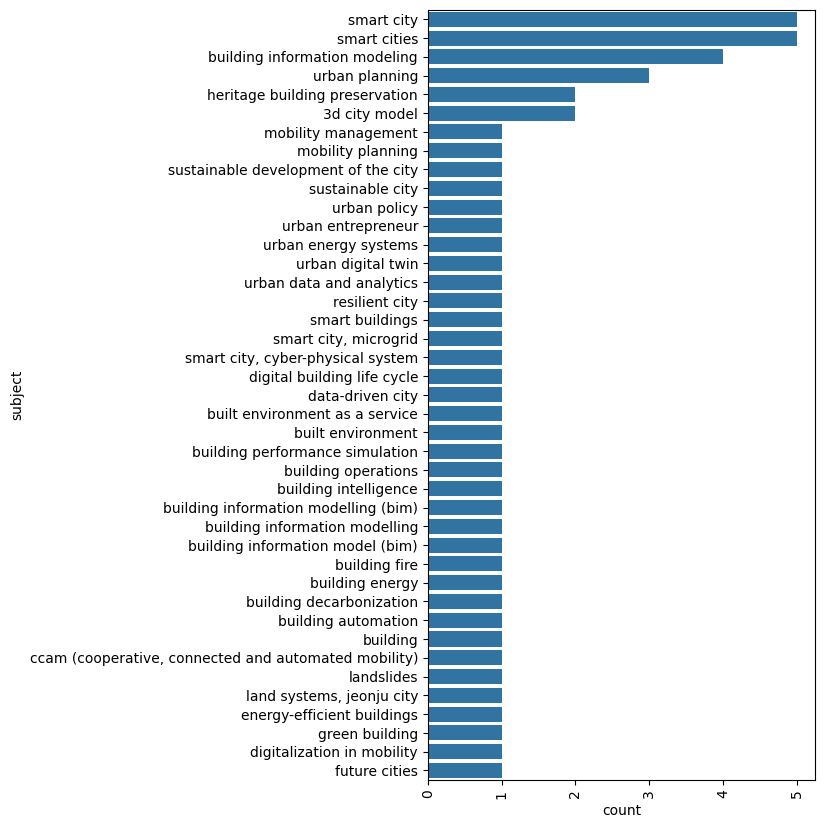

In [78]:
filters = ["urban", "building", "built", "cit", "geospatial", "geog", "smart", "mobili"]

def filter_by_keywords(text, keywords):
  """
  Checks if any of the keywords are present in the text (whole word or part of a word).

  Args:
      text: The text to search (string).
      keywords: A list of keywords to search for (strings).

  Returns:
      True if any keyword is found in the text, False otherwise.
  """
  for keyword in keywords:
    if keyword.lower() in text.lower():  # Case-insensitive search
      return True
  return False

filters = ["urban", "building", "built", " city", " cities", "geospatial", "geog", "mobili", "geoai", "district", "neighborhood", "land"]

filtered_df = values_df[values_df["subject"].apply(lambda text: filter_by_keywords(text, filters))]



plt.figure(figsize=(5, 10))
sns.barplot(filtered_df, y="subject", x="count")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()
